In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-transactions-online-sales-dataset/online_retail_II.xlsx


In [2]:
df=pd.read_excel('/kaggle/input/retail-transactions-online-sales-dataset/online_retail_II.xlsx')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


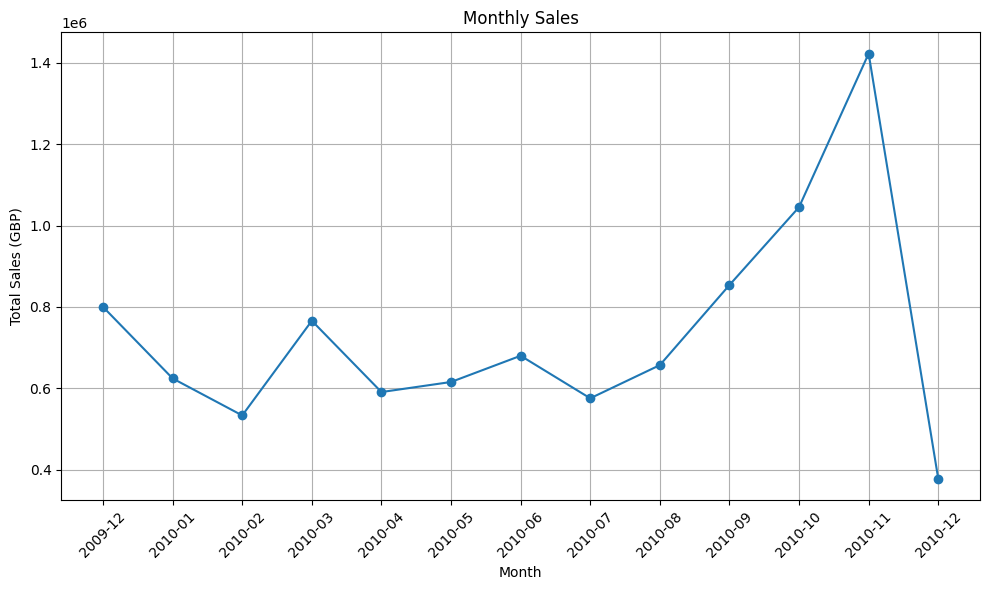

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate total sales per month
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['TotalSales'] = df['Quantity'] * df['Price']
monthly_sales = df.groupby('Month')['TotalSales'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalSales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (GBP)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()